# Stock Market Prediction using Numerical and Textual Analysis
### Submitted by Vipul Dass
### [Linked-in](https://www.linkedin.com/in/vipul-dass-94b82b9a/)


### Stock Market Prediction using Numerical and Textual Analysis
(Level - Advanced)

● Objective: Create a hybrid model for stock price/performance
prediction using numerical analysis of historical stock prices, and
sentimental analysis of news headlines

● Stock to analyze and predict - SENSEX (S&P BSE SENSEX)

● Download historical stock prices from finance.yahoo.com

● Download textual (news) data from https://bit.ly/36fFPI6

● Use either R or Python, or both for separate analysis and then
combine the findings to create a hybrid model

● You are free to select a different stock to analyze and news dataset
as well while not changing the objective of the task

- Stock historical data imported using yfinance
- News headlines data obtained from kaggle. [Link](https://www.kaggle.com/miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests)

- Sources from where I incorporated techniques used in this notebook, in addition to library documentation for various libraries:

https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/
    
https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664?gi=a417dc3c0200

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import yfinance as yf


# Part 1 : Get News Headlines

In [2]:
news = pd.read_csv('analyst_ratings_processed.csv')

news.head()

,Unnamed: 0,title,date,stock
0,0.0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:00-04:00,A
1,1.0,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00-04:00,A
2,2.0,71 Biggest Movers From Friday,2020-05-26 04:30:00-04:00,A
3,3.0,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:00-04:00,A
4,4.0,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:00-04:00,A


### SELECT A TARGET STOCK

- TESLA (TSLA)

In [3]:
news['stock'].value_counts()

MRK     3334
MS      3242
MU      3144
NVDA    3133
QQQ     3100
        ... 
RAVI       1
MLPL       1
GRI        1
CSM        1
IEI        1
Name: stock, Length: 6192, dtype: int64

In [4]:
TSLA = news[news['stock']=='TSLA']
TSLA = TSLA.reset_index(drop=True)

In [5]:
dropped = ['Unnamed: 0','stock']
TSLA.drop(dropped,axis = 1,inplace = True)

TSLA

,title,date
0,Tesla's Stock Closes At All-Time High As Musk ...,2020-06-10 17:02:00-04:00
1,'Tesla factory workplace safety is 5% better t...,2020-06-10 15:08:00-04:00
2,'Tesla hacker unlocks Performance upgrade and ...,2020-06-10 12:41:00-04:00
3,GM On Track To Spend $20B On EV And AV Develop...,2020-06-10 11:33:00-04:00
4,"Tesla's Journey To $1,000 In 2020",2020-06-10 10:15:00-04:00
...,...,...
1925,Electrek.Co Tweet: Tesla's head of Europe is out,2019-07-02 06:09:00-04:00
1926,Tesla's Q2 Delivery Number Could Cause A Big Move,2019-07-01 14:56:00-04:00
1927,'Tesla Electric Airplane? Elon Musk sees elect...,2019-07-01 12:17:00-04:00
1928,"UPDATE: JMP Reiterates Outperform, $347 Target...",2019-07-01 11:41:00-04:00


In [6]:
order = ['date','title']
TSLA = TSLA[order]


In [7]:
TSLA.dtypes

date     object
title    object
dtype: object

In [8]:
TSLA.isnull().sum()

date     0
title    0
dtype: int64

In [9]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1930 non-null   object
 1   title   1930 non-null   object
dtypes: object(2)
memory usage: 30.3+ KB


In [10]:
#Adjust date info
TSLA['date'] = pd.to_datetime(TSLA['date'],utc = True)

TSLA['date'] = TSLA['date'].dt.date
TSLA

,date,title
0,2020-06-10,Tesla's Stock Closes At All-Time High As Musk ...
1,2020-06-10,'Tesla factory workplace safety is 5% better t...
2,2020-06-10,'Tesla hacker unlocks Performance upgrade and ...
3,2020-06-10,GM On Track To Spend $20B On EV And AV Develop...
4,2020-06-10,"Tesla's Journey To $1,000 In 2020"
...,...,...
1925,2019-07-02,Electrek.Co Tweet: Tesla's head of Europe is out
1926,2019-07-01,Tesla's Q2 Delivery Number Could Cause A Big Move
1927,2019-07-01,'Tesla Electric Airplane? Elon Musk sees elect...
1928,2019-07-01,"UPDATE: JMP Reiterates Outperform, $347 Target..."


In [11]:
TSLA = TSLA.groupby(['date'])['title'].apply(lambda x: ','.join(x)).reset_index()
TSLA

,date,title
0,2019-07-01,Tesla's Q2 Delivery Number Could Cause A Big M...
1,2019-07-02,"Tesla, Unum Therapeutics Making Big Moves In T..."
2,2019-07-03,Big Tesla Options Trades Could Signal Institut...
3,2019-07-05,'Tesla reduces the price of its solar systems'...
4,2019-07-06,"Barron's Picks And Pans: Coca-Cola, Kroger, Sh..."
...,...,...
280,2020-06-05,"ESPAÑOL • Cannabis en Argentina, Blockchain Ur..."
281,2020-06-06,"Bulls And Bears Of The Week: Gilead, Shopify, ..."
282,2020-06-08,"NASDAQ Closes At All-Time High,Why Nikola's St..."
283,2020-06-09,"Volkswagen Cuts Costs, Targets Electric Future..."


In [12]:
TSLA.set_index('date', inplace= True)
TSLA

,title
date,
2019-07-01,Tesla's Q2 Delivery Number Could Cause A Big M...
2019-07-02,"Tesla, Unum Therapeutics Making Big Moves In T..."
2019-07-03,Big Tesla Options Trades Could Signal Institut...
2019-07-05,'Tesla reduces the price of its solar systems'...
2019-07-06,"Barron's Picks And Pans: Coca-Cola, Kroger, Sh..."
...,...
2020-06-05,"ESPAÑOL • Cannabis en Argentina, Blockchain Ur..."
2020-06-06,"Bulls And Bears Of The Week: Gilead, Shopify, ..."
2020-06-08,"NASDAQ Closes At All-Time High,Why Nikola's St..."


In [13]:
TSLA = TSLA.sort_index(ascending = True,axis = 0)

In [14]:
TSLA.isnull().sum()

title    0
dtype: int64

## Part 2 :  Get Stock Price History For Tesla

In [15]:
#Create Ticker Instance for TSLA
TSLA_S = yf.Ticker('TSLA')
TSLA_S

yfinance.Ticker object <TSLA>

In [16]:
hist = TSLA_S.history(start = '2019-07-01', end = '2020-06-10' )
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-07-01,46.042000,46.619999,45.256001,45.433998,41067000,0,0
2019-07-02,45.778000,45.830002,44.444000,44.910000,46295000,0,0
2019-07-03,47.877998,48.313999,46.902000,46.980000,71005500,0,0
2019-07-05,46.914001,47.090000,46.160000,46.619999,35328500,0,0
2019-07-08,46.248001,46.450001,45.731998,46.068001,29402500,0,0
...,...,...,...,...,...,...,...
2020-06-03,177.623993,179.587997,176.020004,176.591995,39747500,0,0
2020-06-04,177.975998,179.149994,171.688004,172.876007,44438500,0,0
2020-06-05,175.567993,177.304001,173.240005,177.132004,39059500,0,0


In [17]:
dropped = ['Dividends','Stock Splits']
hist.drop(dropped,axis = 1,inplace = True)
hist

,Open,High,Low,Close,Volume
Date,,,,,
2019-07-01,46.042000,46.619999,45.256001,45.433998,41067000
2019-07-02,45.778000,45.830002,44.444000,44.910000,46295000
2019-07-03,47.877998,48.313999,46.902000,46.980000,71005500
2019-07-05,46.914001,47.090000,46.160000,46.619999,35328500
2019-07-08,46.248001,46.450001,45.731998,46.068001,29402500
...,...,...,...,...,...
2020-06-03,177.623993,179.587997,176.020004,176.591995,39747500
2020-06-04,177.975998,179.149994,171.688004,172.876007,44438500
2020-06-05,175.567993,177.304001,173.240005,177.132004,39059500


In [18]:
hist.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Part 3: Combine the Text Data and the Stock Price Data

In [19]:
#Combine
TSLA_C = pd.concat([hist,TSLA],axis = 1)
TSLA_C.isnull().sum()

Open      51
High      51
Low       51
Close     51
Volume    51
title      4
dtype: int64

In [20]:
TSLA_C.dropna(axis = 0,inplace = True)
TSLA_C.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
title     0
dtype: int64

In [21]:
TSLA_C

,Open,High,Low,Close,Volume,title
2019-07-01,46.042000,46.619999,45.256001,45.433998,41067000.0,Tesla's Q2 Delivery Number Could Cause A Big M...
2019-07-02,45.778000,45.830002,44.444000,44.910000,46295000.0,"Tesla, Unum Therapeutics Making Big Moves In T..."
2019-07-03,47.877998,48.313999,46.902000,46.980000,71005500.0,Big Tesla Options Trades Could Signal Institut...
2019-07-05,46.914001,47.090000,46.160000,46.619999,35328500.0,'Tesla reduces the price of its solar systems'...
2019-07-08,46.248001,46.450001,45.731998,46.068001,29402500.0,"Investor Movement Index Summary: June 2019,Ind..."
...,...,...,...,...,...,...
2020-06-03,177.623993,179.587997,176.020004,176.591995,39747500.0,'Tesla announces massive Supercharger expansio...
2020-06-04,177.975998,179.149994,171.688004,172.876007,44438500.0,What Elon Musk Thinks About Amazon: 'Monopolie...
2020-06-05,175.567993,177.304001,173.240005,177.132004,39059500.0,"ESPAÑOL • Cannabis en Argentina, Blockchain Ur..."
2020-06-08,183.800003,190.000000,181.832001,189.983994,70873500.0,"NASDAQ Closes At All-Time High,Why Nikola's St..."


In [22]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Vipul
[nltk_data]     Dass\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [24]:
TSLA_C['sentiment_compound'] = TSLA_C['title'].apply(lambda x: sid.polarity_scores(x)['compound'])
#TSLA_C['sentiment_positive'] = TSLA_C['title'].apply(lambda x: sid.polarity_scores(x)['pos'])
#TSLA_C['sentiment_negative'] = TSLA_C['title'].apply(lambda x: sid.polarity_scores(x)['neg'])
#TSLA_C['sentiment_neutral'] = TSLA_C['title'].apply(lambda x: sid.polarity_scores(x)['neu'])
TSLA_C.drop('title',axis = 1,inplace = True)
TSLA_C

,Open,High,Low,Close,Volume,sentiment_compound
2019-07-01,46.042000,46.619999,45.256001,45.433998,41067000.0,0.4939
2019-07-02,45.778000,45.830002,44.444000,44.910000,46295000.0,0.3182
2019-07-03,47.877998,48.313999,46.902000,46.980000,71005500.0,0.9081
2019-07-05,46.914001,47.090000,46.160000,46.619999,35328500.0,0.2023
2019-07-08,46.248001,46.450001,45.731998,46.068001,29402500.0,0.1027
...,...,...,...,...,...,...
2020-06-03,177.623993,179.587997,176.020004,176.591995,39747500.0,0.4939
2020-06-04,177.975998,179.149994,171.688004,172.876007,44438500.0,0.2924
2020-06-05,175.567993,177.304001,173.240005,177.132004,39059500.0,0.4404
2020-06-08,183.800003,190.000000,181.832001,189.983994,70873500.0,0.9393


## Part5: Stock Price Prediction Using LTSM

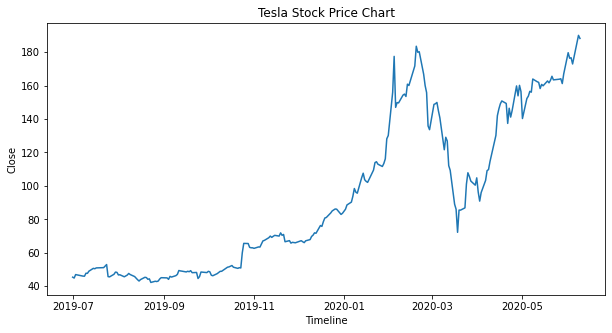

In [25]:
plt.figure(figsize = (10,5))
plt.xlabel('Timeline')
plt.title('Tesla Stock Price Chart')
sns.lineplot(data = TSLA_C['Close'])
plt.show()


In [26]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


In [27]:
count = TSLA_C.shape[0]
count

234

In [28]:
#Predicting 1 step ahead
TSLA_C['close_shift'] = TSLA_C['Close'].shift(-1)
TSLA_C['compound_shift'] = TSLA_C['sentiment_compound'].shift(-1)
TSLA_C.dropna(axis = 0,inplace = True)
TSLA_C

,Open,High,Low,Close,Volume,sentiment_compound,close_shift,compound_shift
2019-07-01,46.042000,46.619999,45.256001,45.433998,41067000.0,0.4939,44.910000,0.3182
2019-07-02,45.778000,45.830002,44.444000,44.910000,46295000.0,0.3182,46.980000,0.9081
2019-07-03,47.877998,48.313999,46.902000,46.980000,71005500.0,0.9081,46.619999,0.2023
2019-07-05,46.914001,47.090000,46.160000,46.619999,35328500.0,0.2023,46.068001,0.1027
2019-07-08,46.248001,46.450001,45.731998,46.068001,29402500.0,0.1027,46.012001,0.9042
...,...,...,...,...,...,...,...,...
2020-06-02,178.940002,181.731995,174.199997,176.311996,67828000.0,0.7717,176.591995,0.4939
2020-06-03,177.623993,179.587997,176.020004,176.591995,39747500.0,0.4939,172.876007,0.2924
2020-06-04,177.975998,179.149994,171.688004,172.876007,44438500.0,0.2924,177.132004,0.4404
2020-06-05,175.567993,177.304001,173.240005,177.132004,39059500.0,0.4404,189.983994,0.9393


In [29]:
TSLA_C = TSLA_C[['close_shift','Close','compound_shift','sentiment_compound','Open','High','Low','Volume']]
TSLA_C

,close_shift,Close,compound_shift,sentiment_compound,Open,High,Low,Volume
2019-07-01,44.910000,45.433998,0.3182,0.4939,46.042000,46.619999,45.256001,41067000.0
2019-07-02,46.980000,44.910000,0.9081,0.3182,45.778000,45.830002,44.444000,46295000.0
2019-07-03,46.619999,46.980000,0.2023,0.9081,47.877998,48.313999,46.902000,71005500.0
2019-07-05,46.068001,46.619999,0.1027,0.2023,46.914001,47.090000,46.160000,35328500.0
2019-07-08,46.012001,46.068001,0.9042,0.1027,46.248001,46.450001,45.731998,29402500.0
...,...,...,...,...,...,...,...,...
2020-06-02,176.591995,176.311996,0.4939,0.7717,178.940002,181.731995,174.199997,67828000.0
2020-06-03,172.876007,176.591995,0.2924,0.4939,177.623993,179.587997,176.020004,39747500.0
2020-06-04,177.132004,172.876007,0.4404,0.2924,177.975998,179.149994,171.688004,44438500.0
2020-06-05,189.983994,177.132004,0.9393,0.4404,175.567993,177.304001,173.240005,39059500.0


In [30]:
# Targets & Inputs
features = ['Close','compound_shift','sentiment_compound','Open','High','Low','Volume']
y = TSLA_C['close_shift']
x = TSLA_C[features]

In [31]:
# Scale the Data

# Scale x
scale_x = MinMaxScaler(feature_range = (-1,1))
x = np.array(x).reshape(len(x),len(features))
x = scale_x.fit_transform(x)

# Scale y
scale_y = MinMaxScaler(feature_range = (-1,1))
y = np.array(y).reshape(len(y),1)
y = scale_y.fit_transform(y)




In [32]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(TSLA_C)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(TSLA_C)
start = total_data - data_to_use


# Create Train and Test sets

X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  


### LSTM RNN
Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video). For example, LSTM is applicable to tasks such as unsegmented, connected handwriting recognition, speech recognition and anomaly detection in network traffic or IDSs (intrusion detection systems). 

In [33]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

In [34]:
#Instantize the Model
model=Sequential()
model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(len(features),1)))

model.add(LSTM(100,return_sequences=True,activation='tanh'))

model.add(LSTM(100,activation='tanh'))

model.add(Dense(1))

In [35]:
#Compiling the model
model.compile(loss='mse' , optimizer='adam')

#Fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=8, verbose=1)

Epoch 1/10
19/19 [==============================] - 8s 163ms/step - loss: 0.3414 - val_loss: 0.2276
Epoch 2/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0534 - val_loss: 0.2228
Epoch 3/10
19/19 [==============================] - 0s 11ms/step - loss: 0.0356 - val_loss: 0.1968
Epoch 4/10
19/19 [==============================] - 0s 11ms/step - loss: 0.0337 - val_loss: 0.1860
Epoch 5/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0311 - val_loss: 0.1594
Epoch 6/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0269 - val_loss: 0.1895
Epoch 7/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0283 - val_loss: 0.1825
Epoch 8/10
19/19 [==============================] - 0s 13ms/step - loss: 0.0309 - val_loss: 0.1859
Epoch 9/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0315 - val_loss: 0.2072
Epoch 10/10
19/19 [==============================] - 0s 13ms/step - loss: 0.0272 - val_loss: 0.1489


In [36]:
# performing predictions
predictions = model.predict(X_test) 

# unscaling the predictions
predictions = scale_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

In [37]:
# unscaling the test feature dataset, x_test
X_test = scale_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(features))))

# unscaling the test y dataset, y_test
y_train = scale_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scale_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

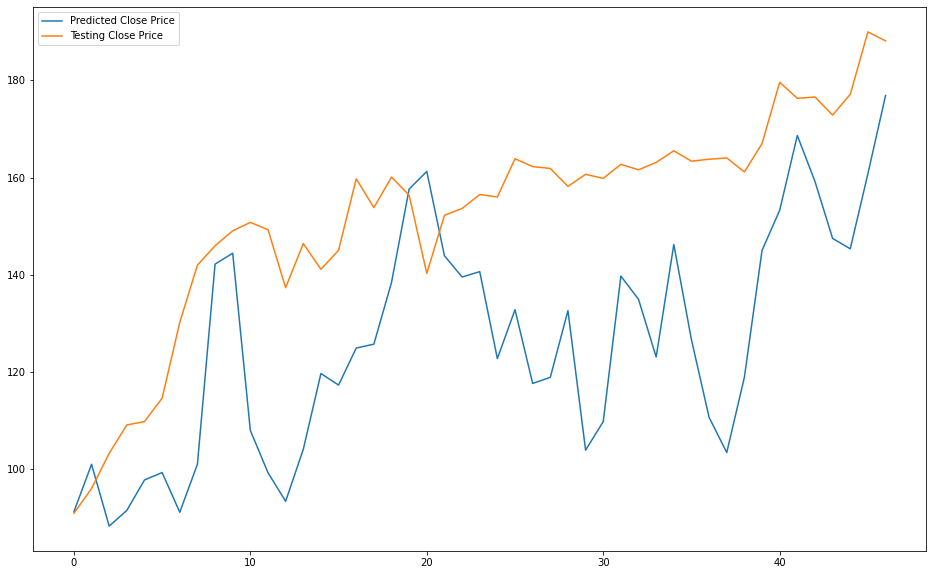

In [40]:
# plotting
plt.figure(figsize=(16,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions, label="Predicted Close Price")
plt.plot(y_test, label="Testing Close Price")
plt.legend
plt.show()